**VALIDANDO LA HIPÓTESIS 1:** Usando prueba *t de Student* con datos extraídos de la simulación

Grupo pocos servidores: [12.5, 5.2]
Grupo muchos servidores: [0.2, 0.0, 0.0, 0.0, 0.0]
T-statistic: 2.4136, p-value: 0.2500
No se rechaza la hipótesis nula: no hay diferencia significativa.
A partir de cierto número de servidores, agregar más no cambia mucho el tiempo de espera.


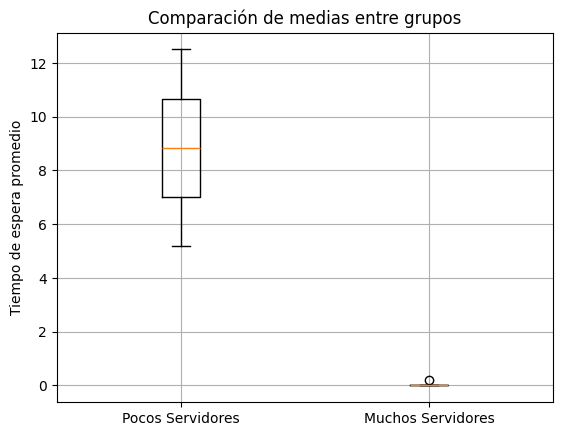

In [66]:
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

# Datos extraídos de simulación
servers = [2, 3, 4, 5, 6, 7, 8]
wait_times = [12.5, 5.2, 0.2, 0.0, 0.0, 0.0, 0.0]

# Separar en dos grupos:
# - Bajo número de servidores
# - Alto número de servidores
low_group = wait_times[0:2]   # para servidores 2 y 3
high_group = wait_times[2:]   # para servidores 4, 5, 6, 7, 8

# Test de comparación de medias
stat, p_value = ttest_ind(low_group, high_group, equal_var=False)

print("Grupo pocos servidores:", low_group)
print("Grupo muchos servidores:", high_group)
print(f"T-statistic: {stat:.4f}, p-value: {p_value:.4f}")

# Interpretación
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula: hay una diferencia significativa.")
    print("Aumentar el número de servidores sigue reduciendo el tiempo de espera.")
else:
    print("No se rechaza la hipótesis nula: no hay diferencia significativa.")
    print("A partir de cierto número de servidores, agregar más no cambia mucho el tiempo de espera.")

# Visualización
plt.boxplot([low_group, high_group], tick_labels=['Pocos Servidores', 'Muchos Servidores'])
plt.ylabel('Tiempo de espera promedio')
plt.title('Comparación de medias entre grupos')
plt.grid(True)
plt.show()



**VALIDANDO LA HIPÓTESIS 2:** Usando prueba *Chi-cuadrado* con datos extraídos de la simulación

Clientes por servidor (observado): [110, 22, 3]
Distribución esperada (uniforme): [45.0, 45.0, 45.0]
Chi-cuadrado: 144.8444, p-value: 0.0000
Se rechaza la hipótesis nula: la asignación no es equitativa.
El sistema favorece servidores con menor ID (H2 respaldada).


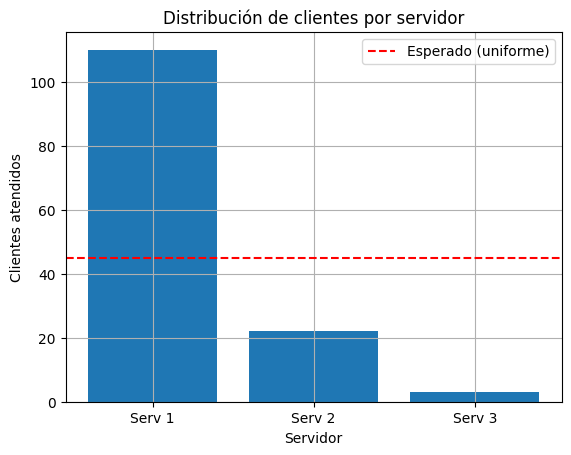

In [67]:
from scipy.stats import chisquare
import matplotlib.pyplot as plt

# Datos observados: cantidad de clientes atendidos por cada servidor
clientes_por_servidor = [110, 22, 3]

# Datos esperados: si fuera distribución equitativa
total = sum(clientes_por_servidor)
servidores = len(clientes_por_servidor)
esperado = [total / servidores] * servidores

# Prueba de Chi-cuadrado
chi2_stat, p_value = chisquare(f_obs=clientes_por_servidor, f_exp=esperado)

# Resultados
print("Clientes por servidor (observado):", clientes_por_servidor)
print("Distribución esperada (uniforme):", esperado)
print(f"Chi-cuadrado: {chi2_stat:.4f}, p-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula: la asignación no es equitativa.")
    print("El sistema favorece servidores con menor ID (H2 respaldada).")
else:
    print("No se rechaza la hipótesis nula: la asignación es equitativa.")
    print("No hay evidencia clara de favoritismo por ID (H2 no respaldada).")

# Visualización
plt.bar(range(1, servidores + 1), clientes_por_servidor, tick_label=[f"Serv {i}" for i in range(1, servidores + 1)])
plt.axhline(total / servidores, color='r', linestyle='--', label='Esperado (uniforme)')
plt.title("Distribución de clientes por servidor")
plt.xlabel("Servidor")
plt.ylabel("Clientes atendidos")
plt.legend()
plt.grid(True)
plt.show()


**VALIDANDO LA HIPÓTESIS 3:** Usando prueba *ANOVA* con datos extraídos de la simulación

F-estadístico: 76.1480, p-value: 0.0001
Se rechaza la hipótesis nula: hay diferencias significativas entre los niveles.
H3 respaldada: con mayor congestión, la carga tiende a distribuirse más equitativamente.


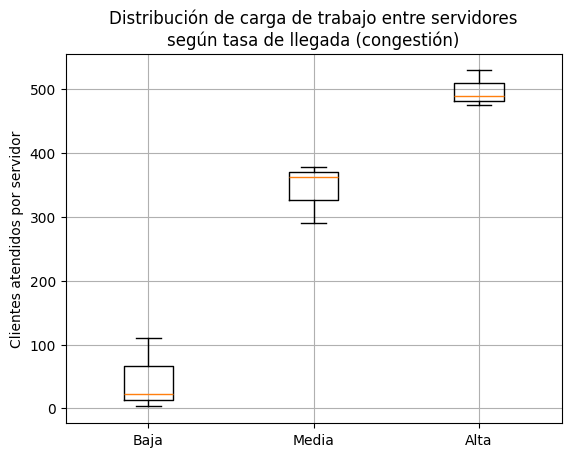

In [68]:
import numpy as np
from scipy.stats import f_oneway
import matplotlib.pyplot as plt

# Cada lista representa un experimento con una tasa de llegada diferente (alta congestión → tasas más altas)

# Baja congestión
cargas_baja = [110, 22, 3]

# Media congestión
cargas_media = [378, 363, 290]

# Alta congestión
cargas_alta = [475, 529, 489]

# --- Prueba ANOVA ---
f_stat, p_value = f_oneway(cargas_baja, cargas_media, cargas_alta)

print(f"F-estadístico: {f_stat:.4f}, p-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula: hay diferencias significativas entre los niveles.")
    print("H3 respaldada: con mayor congestión, la carga tiende a distribuirse más equitativamente.")
else:
    print("No se rechaza la hipótesis nula: no hay diferencias claras.")
    print("No se puede confirmar que la congestión afecte la equidad de distribución.")

# --- Visualización ---
labels = ['Baja', 'Media', 'Alta']
data = [cargas_baja, cargas_media, cargas_alta]

plt.boxplot(data, tick_labels=labels)
plt.title("Distribución de carga de trabajo entre servidores\nsegún tasa de llegada (congestión)")
plt.ylabel("Clientes atendidos por servidor")
plt.grid(True)
plt.show()


**VALIDANDO LA HIPÓTESIS 4:** Usando *regresión lineal* con datos extraídos de la simulación

Pendiente (slope): 4.3463
Valor p: 0.0097
Coeficiente de determinación (R²): 0.9206
Existe una relación positiva significativa entre la tasa de llegada y el tiempo promedio en el sistema. H4 validada.


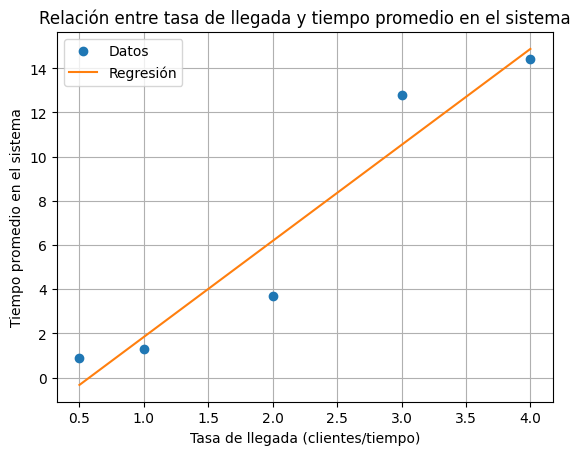

In [69]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

# --- Datos extraídos de la simulación ---
arrival_rates = [0.5, 1.0, 2.0, 3.0, 4.0]  # tasa de llegada (clientes/tiempo)
avg_system_times = [0.9, 1.3, 3.7, 12.8, 14.4]  # tiempo promedio en el sistema

# --- Regresión lineal ---
slope, intercept, r_value, p_value, std_err = linregress(arrival_rates, avg_system_times)

# --- Resultados ---
print(f"Pendiente (slope): {slope:.4f}")
print(f"Valor p: {p_value:.4f}")
print(f"Coeficiente de determinación (R²): {r_value**2:.4f}")

alpha = 0.05
if slope > 0 and p_value < alpha:
    print("Existe una relación positiva significativa entre la tasa de llegada y el tiempo promedio en el sistema. H4 validada.")
else:
    print("No se puede confirmar una relación positiva significativa. H4 no se valida con estos datos.")

# --- Gráfica ---
plt.plot(arrival_rates, avg_system_times, 'o', label='Datos')
plt.plot(arrival_rates, [slope * x + intercept for x in arrival_rates], label='Regresión')
plt.xlabel('Tasa de llegada (clientes/tiempo)')
plt.ylabel('Tiempo promedio en el sistema')
plt.title('Relación entre tasa de llegada y tiempo promedio en el sistema')
plt.legend()
plt.grid(True)
plt.show()


**VALIDANDO LA HIPÓTESIS 5:** Usando *regresión lineal* con datos extraídos de la simulación

NOTA: Este test necesita pruebas con datos suficientemente grandes

Pendiente (slope): 526.5714
Valor p: 0.0006
Coeficiente de determinación (R²): 1.0000
Existe una relación positiva significativa: los servidores con mayor tasa de servicio procesan más clientes. H5 validada.


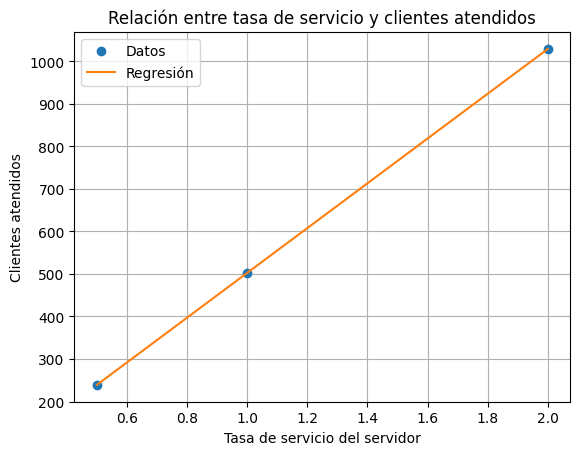

In [70]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

# --- Datos obtenidos de simulación ---
# Cada par representa (tasa_de_servicio, clientes_atendidos)
service_rates = [0.5, 1.0, 2.0]            # tasas de servicio de los servidores
clients_served = [239, 503, 1029]            # número de clientes atendidos por cada uno

# --- Regresión lineal ---
slope, intercept, r_value, p_value, std_err = linregress(service_rates, clients_served)

# --- Resultados ---
print(f"Pendiente (slope): {slope:.4f}")
print(f"Valor p: {p_value:.4f}")
print(f"Coeficiente de determinación (R²): {r_value**2:.4f}")

alpha = 0.05
if slope > 0 and p_value < alpha:
    print("Existe una relación positiva significativa: los servidores con mayor tasa de servicio procesan más clientes. H5 validada.")
else:
    print("No se valida la hipótesis con estos datos. No hay relación significativa.")

# --- Gráfica ---
plt.plot(service_rates, clients_served, 'o', label='Datos')
plt.plot(service_rates, [slope * x + intercept for x in service_rates], label='Regresión')
plt.xlabel('Tasa de servicio del servidor')
plt.ylabel('Clientes atendidos')
plt.title('Relación entre tasa de servicio y clientes atendidos')
plt.legend()
plt.grid(True)
plt.show()


**VALIDANDO LA HIPÓTESIS 6:** Usando *correlación de Spearman* con datos extraídos de la simulación

Coeficiente de Spearman: 1.0000
Valor p: 0.0000
No se valida H6: no hay evidencia significativa de estabilización.


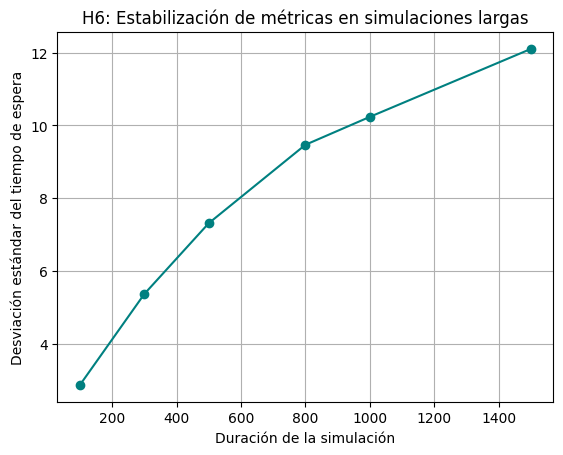

In [71]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# --- Diccionario con tiempos de espera promedio por repetición para cada duración ---
wait_times_by_duration = {
    100: [5.470906884621726, 11.650574080988877, 6.482120025799731, 5.671178771599174, 11.47894698024636, 7.47853739513926, 12.343601841949738, 5.069863053676839, 6.6495596723486985, 5.76368682255219],
    300: [21.329536743841828, 20.039612207907346, 10.19759766855396, 23.516494488749792, 25.491514576175682, 27.232356420933183, 18.3272826696829, 16.917938704727547, 16.482006850217118, 13.146607297403595],
    500: [48.93818712071916, 40.73443430628026, 27.528180802586338, 26.170049693652924, 31.462654589463042, 41.59753263807346, 29.253276616505953, 35.19831396583635, 34.430718334321654, 29.203885422643943],
    800: [50.46596010820393, 54.15305603548905, 50.87010276664227, 61.70950199302983, 37.1739964012185, 69.00067249365755, 46.61206042289577, 51.89716132331391, 66.33083700179891, 56.85691213261163],
    1000: [76.3756108001172, 55.677980574975244, 79.28537277095344, 57.09937141815053, 67.06503417129933, 62.761685220704166, 55.56382899549891, 56.57911022293711, 70.59899191172542, 81.58937290032736],
    1500: [111.98479683471716, 92.35769175932121, 79.48455635659964, 80.58362050577833, 89.67586244924647, 76.16010520304185, 85.08303681807809, 108.27607344332527, 94.17854210995324, 82.06444379450708],
}

# --- Procesamiento de datos ---
durations = []
std_wait_times = []

for duration, times in sorted(wait_times_by_duration.items()):
    durations.append(duration)
    std = np.std(times, ddof=1)  # desviación estándar muestral
    std_wait_times.append(std)

# Correlación de Spearman
coef_spearman, p_value = stats.spearmanr(durations, std_wait_times)

# Mostrar resultados
print(f"Coeficiente de Spearman: {coef_spearman:.4f}")
print(f"Valor p: {p_value:.4f}")
if coef_spearman < 0 and p_value < 0.05:
    print("Se valida H6: la variabilidad tiende a disminuir con la duración.")
else:
    print("No se valida H6: no hay evidencia significativa de estabilización.")

# Gráfica
plt.plot(durations, std_wait_times, 'o-', color='teal')
plt.xlabel('Duración de la simulación')
plt.ylabel('Desviación estándar del tiempo de espera')
plt.title('H6: Estabilización de métricas en simulaciones largas')
plt.grid(True)
plt.show()



**VALIDANDO LA HIPÓTESIS 7:** Usando *correlación de Spearman* con datos extraídos de la simulación

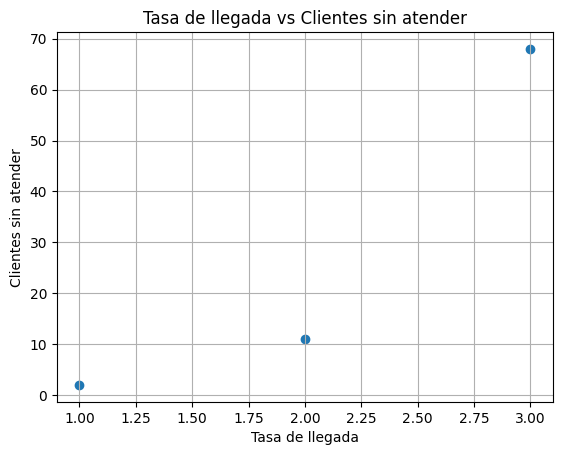

Coeficiente de Spearman (rho): 1.0000
Valor p: 0.0000
Existe una correlación significativa: al aumentar la tasa de llegada, aumentan los clientes sin atender.


In [72]:
from scipy.stats import spearmanr
import matplotlib.pyplot as plt

# 🔢 Datos simulados (ejemplo): puedes cambiar estos valores por los reales
arrival_rates = [1, 2, 3]   # tasa de llegada (lambda)
unattended_clients = [2, 11, 68]   # clientes sin atender al final

# 📈 Gráfico de dispersión
plt.scatter(arrival_rates, unattended_clients)
plt.xlabel("Tasa de llegada")
plt.ylabel("Clientes sin atender")
plt.title("Tasa de llegada vs Clientes sin atender")
plt.grid(True)
plt.show()

# 🧪 Test de correlación de Spearman
rho, p_value = spearmanr(arrival_rates, unattended_clients)
print(f"Coeficiente de Spearman (rho): {rho:.4f}")
print(f"Valor p: {p_value:.4f}")

# 🔍 Interpretación
if p_value < 0.05:
    print("Existe una correlación significativa: al aumentar la tasa de llegada, aumentan los clientes sin atender.")
else:
    print("No se encontró una correlación significativa.")

